In [51]:
import numpy as np
import pandas as pd 

import os
for dirname, subdirs, _ in os.walk('/kaggle/input/intel-image-classification'):
    print(dirname)

/kaggle/input/intel-image-classification
/kaggle/input/intel-image-classification/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain
/kaggle/input/intel-image-classification/seg_train/seg_train/street
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings
/kaggle/input/intel-image-classification/seg_train/seg_train/sea
/kaggle/input/intel-image-classification/seg_train/seg_train/forest
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier
/kaggle/input/intel-image-classification/seg_pred
/kaggle/input/intel-image-classification/seg_pred/seg_pred
/kaggle/input/intel-image-classification/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test/mountain
/kaggle/input/intel-image-classification/seg_test/seg_test/street
/kaggle/input/intel-image-classification/seg_test/seg_test/buildings
/kaggle/input/i

#### The dataset consists of natural scene images across 6 categories:

**Folder hierarchy:**

    /kaggle/input/intel-image-classification
    │
    ├── seg_train/ → Training images
    │ └── seg_train/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    ├── seg_test/ → Testing images
    │ └── seg_test/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    └── seg_pred/ → Prediction images (unlabeled)
    └── seg_pred/

In [52]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [53]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

# List subdirectories (classes) in the training directory
train_subdirs = os.listdir(train_dir)
print("Training subdirectories (classes):")
for subdir in train_subdirs:
    print(subdir)

# List subdirectories (classes) in the test directory
test_subdirs = os.listdir(test_dir)
print("\nTesting subdirectories (classes):")
for subdir in test_subdirs:
    print(subdir)

Training subdirectories (classes):
mountain
street
buildings
sea
forest
glacier

Testing subdirectories (classes):
mountain
street
buildings
sea
forest
glacier


In [54]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
print(os.listdir(train_dir))

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [55]:
class_folder_forest = 'forest'

# Get list of images in chosen class folder
images_list_forest = os.listdir(os.path.join(train_dir, class_folder_forest))
print("First image file:", images_list_forest[0])

First image file: 7981.jpg


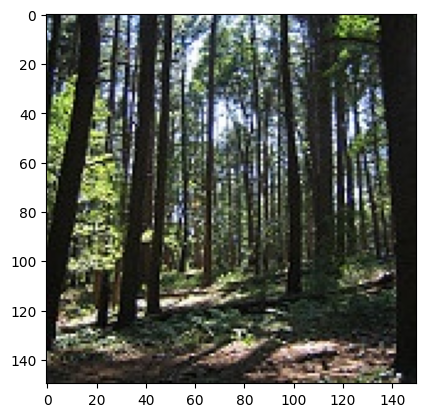

In [56]:
# Full path to the first image
image_path_forest = os.path.join(train_dir, class_folder_forest, images_list_forest[0])

# Read and display the image
image_forest1 = imread(image_path_forest)
plt.imshow(image_forest1)

In [57]:
image_forest1.shape

(150, 150, 3)

In [58]:
class_folder_sea = 'sea'

images_list_sea = os.listdir(os.path.join(train_dir, class_folder_sea))
print("First image file:", images_list_sea[0])

First image file: 19812.jpg


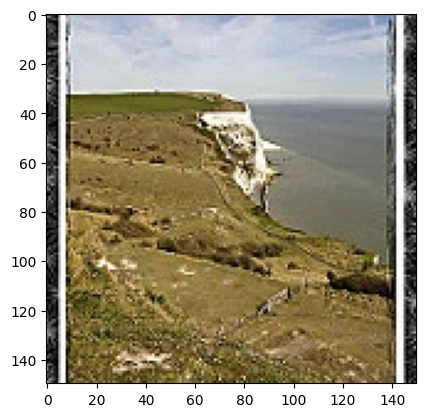

In [59]:
image_path_sea = os.path.join(train_dir, class_folder_sea, images_list_sea[0])

image_sea1 = imread(image_path_sea)
plt.imshow(image_sea1)

In [60]:
image_sea1.shape

(150, 150, 3)

### **Number of Images**

In [61]:
class_folder_mountain = 'mountain'
class_folder_glacier = 'glacier'
class_folder_buildings = 'buildings'
class_folder_street = 'street'

len_forest = len(images_list_forest)
len_sea = len(images_list_sea)
len_street = len(os.listdir(os.path.join(train_dir, class_folder_street)))
len_buildings = len(os.listdir(os.path.join(train_dir, class_folder_buildings)))
len_glacier = len(os.listdir(os.path.join(train_dir, class_folder_glacier)))
len_mountain = len(os.listdir(os.path.join(train_dir, class_folder_mountain)))

In [62]:
print("Glacier: ",len_glacier)
print("Sea: ",len_sea)
print("Mountain: ",len_mountain)
print("buildings: ",len_buildings)
print("Forest: ",len_forest)
print("Street: ",len_street)


Glacier:  2404
Sea:  2274
Mountain:  2512
buildings:  2191
Forest:  2271
Street:  2382


### Analyzing Image Dimensions in the "forest" Folder

In [63]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_dir, 'forest')):
    img = imread(os.path.join(test_dir, 'forest', image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

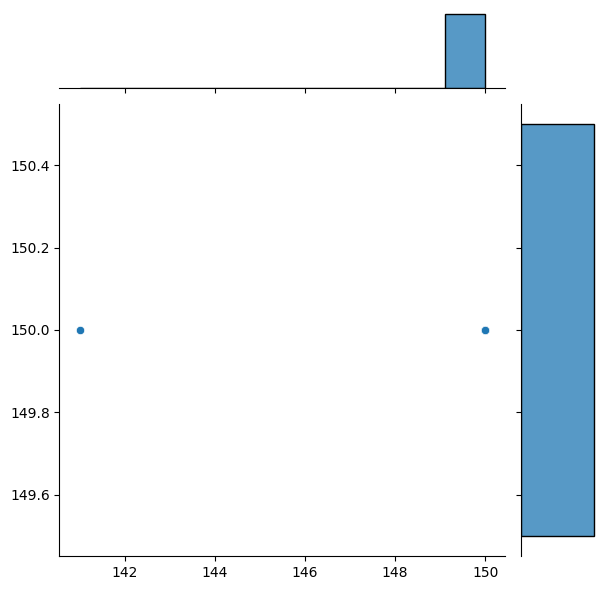

In [64]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

#### dataset seems to be preprocessed to a fixed size (150×150).

# Preparing the Data for the model

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us.

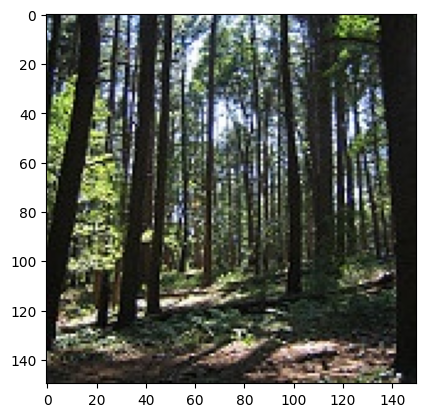

In [65]:
plt.imshow(image_forest1)

In [66]:
image_forest1.max()

255

In [67]:
image_forest1.min()

0

In [72]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

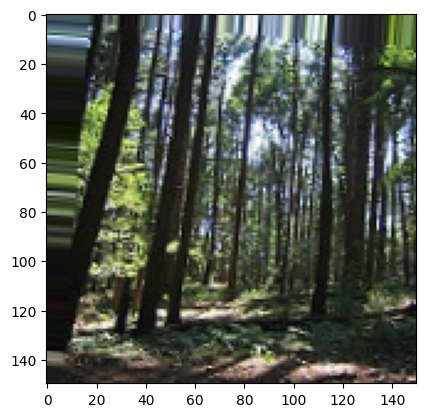

In [73]:
plt.imshow(image_gen.random_transform(image_forest1))

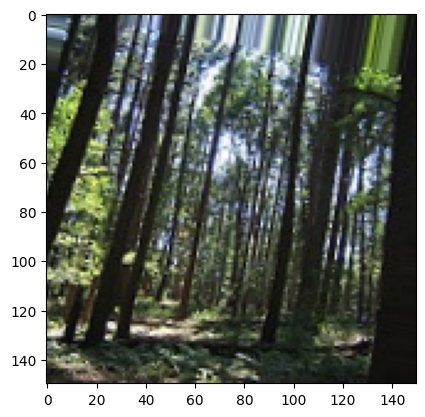

In [74]:
plt.imshow(image_gen.random_transform(image_forest1))

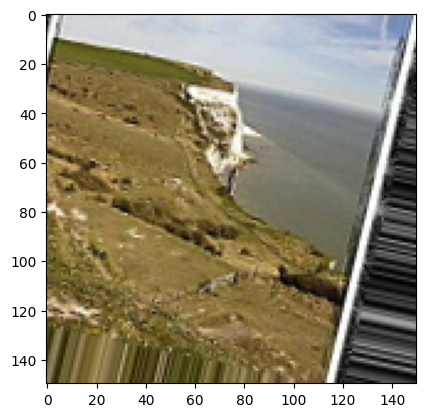

In [75]:
plt.imshow(image_gen.random_transform(image_sea1))

## Generated Manipulated iamge from a directory

In [76]:
image_gen.flow_from_directory(train_dir)

Found 14034 images belonging to 6 classes.


In [77]:
image_gen.flow_from_directory(test_dir)

Found 3000 images belonging to 6 classes.


#### `flow_from_directory`

- Loads images from a directory and creates a **data generator** for training.  
- Automatically labels images based on **folder names**.  
- Can apply **rescaling, augmentation, and batching**.


# Creating the Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [99]:
image_shape = (150, 150, 3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [100]:
model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

# Output layer – 6 classes → softmax
model.add(Dense(6,activation='softmax'))

In [101]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,564,998 (36.49 MB)

 Trainable params: 9,564,998 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

# Early Stopping

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#### `val_accuracy` vs `val_loss`

- **`val_accuracy`**  
  - Measures the proportion of correct predictions on the validation set.  
  - Best for **classification tasks** where the goal is to maximize correct predictions.  
  - Stopping on `val_accuracy` prevents overfitting once accuracy plateaus.

- **`val_loss`**  
  - Measures the error (loss) on the validation set.  
  - Useful for **regression tasks** or **imbalanced datasets**.  
  - Can catch subtle improvements even if accuracy doesn’t change.

#### `restore_best_weights=True`

- Restores the model to the **best weights** after EarlyStopping.  
- Prevents keeping weights from later epochs that may have **overfitted**.  

# Training the Model

In [106]:
train_generator = image_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,          
    color_mode='rgb',       # preserve colors
    class_mode="categorical"
)

Found 14034 images belonging to 6 classes.


In [107]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [108]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,             
    color_mode='rgb',           # keep color info
    class_mode="categorical",
    shuffle=False             
)

Found 3000 images belonging to 6 classes.


In [109]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
results = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 91s 198ms/step - accuracy: 0.5118 - loss: 1.2359 - val_accuracy: 0.7153 - val_loss: 0.7789
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 190ms/step - accuracy: 0.7054 - loss: 0.8057 - val_accuracy: 0.7513 - val_loss: 0.6698
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 192ms/step - accuracy: 0.7405 - loss: 0.7051 - val_accuracy: 0.8117 - val_loss: 0.5598
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.7751 - loss: 0.6243 - val_accuracy: 0.8297 - val_loss: 0.4982
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.7884 - loss: 0.5874 - val_accuracy: 0.8123 - val_loss: 0.5564
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.7863 - loss: 0.5814 - val_accuracy: 0.8247 - val_loss: 0.5064


In [112]:
from tensorflow.keras.models import load_model
model.save('/kaggle/working/intel_image_classifier.h5')

# Evaluting the Model

In [113]:
losses = pd.DataFrame(model.history.history)

<Axes: >

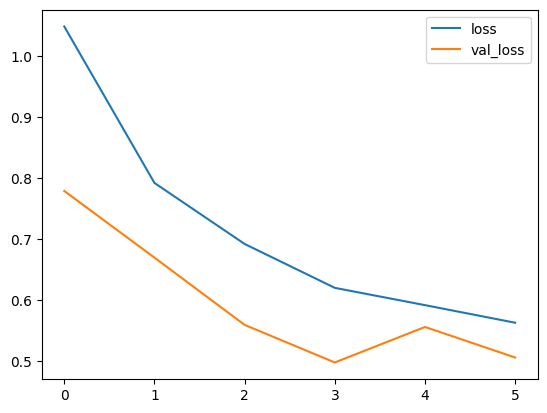

In [114]:
losses[['loss','val_loss']].plot()

In [115]:
model.metrics_names

['loss', 'compile_metrics']

In [116]:
loss, accuracy = model.evaluate(test_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8591 - loss: 0.4177
Loss: 0.5063664317131042
Accuracy: 0.8246666789054871


In [118]:
# 1️⃣ Predict probabilities for all test images
pred_probabilities = model.predict(test_generator) 

# 2️⃣ Convert probabilities to predicted class indices (0-5 for 6 classes)
predictions = np.argmax(pred_probabilities, axis=1)

# 3️⃣ Get true labels
true_labels = test_generator.classes

# 4️⃣ Print first 10 predictions vs true labels
print("Predicted classes:", predictions[:20])
print("True classes:     ", true_labels[:20])

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
Predicted classes: [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True classes:      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [119]:
class_counts = pd.Series(test_generator.classes).value_counts()
print(class_counts)

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64


In [120]:
train_classes = []
for dirname, subdirs, files in os.walk(train_dir):
    for subdir in subdirs:
        train_classes.append(len(os.listdir(os.path.join(dirname, subdir))))
print(train_classes)

[2512, 2382, 2191, 2274, 2271, 2404]


In [121]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


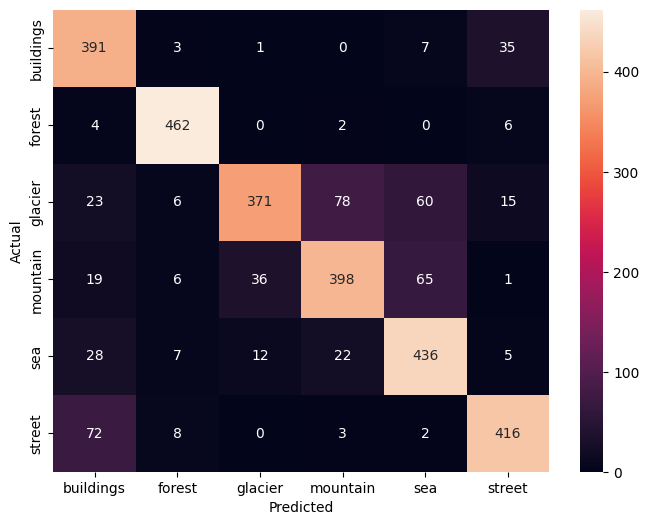

              precision    recall  f1-score   support

   buildings       0.73      0.89      0.80       437
      forest       0.94      0.97      0.96       474
     glacier       0.88      0.67      0.76       553
    mountain       0.79      0.76      0.77       525
         sea       0.76      0.85      0.81       510
      street       0.87      0.83      0.85       501

    accuracy                           0.82      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.82      0.82      3000



In [122]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions,
                            target_names=list(test_generator.class_indices.keys())))
